# Penguin dataset

In this notebook we will analyze penguin dataset from seaborn built-in dataset.

This dataset has 7 features:

1. **species**: species of penguins.
2. **island**: island they belong to.
3. **sex**: sex of penguin.
4. **bill_length_mm**: refers to the measurement of the bird's beak or bill from its tip to the base.
5. **bill_depth_mm**: refers to a measurement used to quantify the thickness or diameter of a bird's beak or bill.
6. **flipper_length_mm**: refers to a measurement used to quantify the size of a bird's or marine mammal's flippers.
7. refers to the measurement of a penguin's body mass or weight.

First, we import the necessary modules and dataset to start the data analysis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sci
import seaborn as sns
import ptitprince as pt

In [2]:
df = sns.load_dataset('penguins')

In [3]:
# show first 6 rows of dataset
df.head(6)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


We start by checking for any `NaN` values in the dataset. If such values exist,
we proceed to remove them before proceeding with the analysis.

In [4]:
# check if there is null in dataframe
df.isnull().values.any()

True

In [5]:
# remove null values, reset index and show new shape of dataframe
df = df.dropna(axis=0).reset_index(drop=True)
df.shape

(333, 7)

From the given details, it's clear that our dataset contains 333 datapoints and 7 features.

In [6]:
#show last 5 rows of dataframe()
df.tail()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
328,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
329,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
330,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
331,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female
332,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,Male


In our dataset, we have three columns with discrete values and four columns with continuous values. This enables us to analyze the variations in the continuous values concerning the discrete values.

Columns that contain discrete values:
* **species**
* **island**
* **sex**

Columns that contain continous values:
* **bill_length_mm**
* **bill_depth_mm**
* **flipper_length_mm**
* **body_mass_g**

To view the discrete values, we can use the `pandas.unique()` function for each column.

In [7]:
print('species unique values: ', df.species.unique())
print('island unique values: ', df.island.unique())
print('sex unique values: ', df.sex.unique())

species unique values:  ['Adelie' 'Chinstrap' 'Gentoo']
island unique values:  ['Torgersen' 'Biscoe' 'Dream']
sex unique values:  ['Male' 'Female']


we can see number of penguins per species:

In [8]:
print('number of Adelie penguins: ', df[df['species']=='Adelie'].shape[0])
print('number of Chinstrap penguins: ', df[df['species']=='Chinstrap'].shape[0])
print('number of Gentoo penguins: ', df[df['species']=='Gentoo'].shape[0])

number of Adelie penguins:  146
number of Chinstrap penguins:  68
number of Gentoo penguins:  119


also per islands:

In [9]:
print('number of penguins in island Torgersen: ', df[df['island']=='Torgersen'].shape[0])
print('number of penguins in island Biscoe: ', df[df['island']=='Biscoe'].shape[0])
print('number of penguins in island Dream: ', df[df['island']=='Dream'].shape[0])

number of penguins in island Torgersen:  47
number of penguins in island Biscoe:  163
number of penguins in island Dream:  123


However, for better visual presentation, bar plots are better choice.

First, let's display the count of penguins per species and islands:

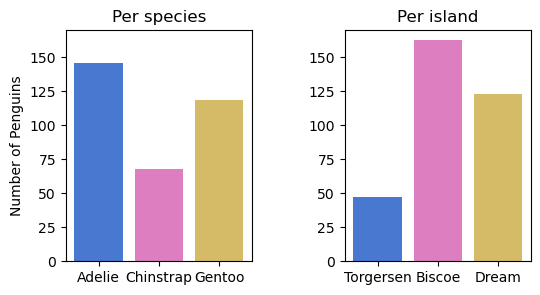

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 3))

colors = sns.color_palette("muted")  
colors = [colors[0], colors[6], colors[8]]

for i, ii in enumerate(df['species'].unique()):
    ax1.bar(ii, df[df['species'] == ii]['species'].count(), color=colors[i])
    
for i, ii in enumerate(df['island'].unique()):
    ax2.bar(ii, df[df['island'] == ii]['island'].count(), color=colors[i])    
        
for i in [ax1, ax2]:
    i.set_ylim(0, 170)   
    
ax1.set_title('Per species')
ax2.set_title('Per island')

ax1.set_ylabel('Number of Penguins')
    
fig.subplots_adjust(wspace=0.5)  

We can gather more comprehensive information, such as examining how the number of penguins belonging to different species varies across different islands.

Text(0, 0.5, 'Number of Penguins')

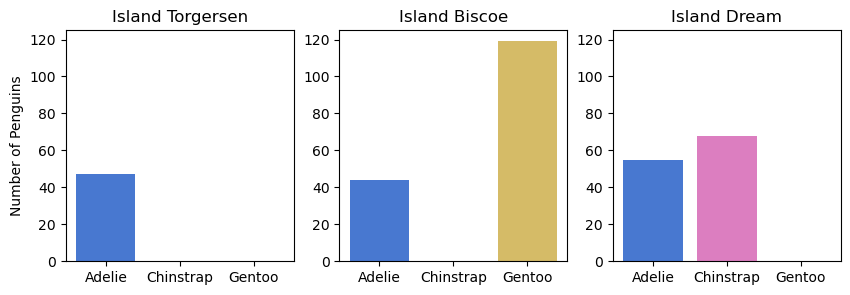

In [11]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 3))


for i, ii in enumerate(df['species'].unique()):
    ax1.bar(ii, df[(df['species']==ii) & (df['island']=='Torgersen')]['species'].count(),
           color=colors[i])
    
for i, ii in enumerate(df['species'].unique()):
    ax2.bar(ii, df[(df['species']==ii) & (df['island']=='Biscoe')]['species'].count(),
           color=colors[i])    
    
for i, ii in enumerate(df['species'].unique()):
    ax3.bar(ii, df[(df['species']==ii) & (df['island']=='Dream')]['species'].count(),
           color=colors[i])                
    
for i in [ax1, ax2, ax3]:
    i.set_ylim(0, 125)
    
ax1.set_title('Island Torgersen')
ax2.set_title('Island Biscoe')
ax3.set_title('Island Dream')

ax1.set_ylabel('Number of Penguins')    

It is evident from the data that certain species of penguins are exclusive to particular islands. For instance, all Gentoo penguins reside on Biscoe island, while Chinstrap penguins inhabit Dream island. However, Adelie penguins can be found across all three islands.

In [12]:
df.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female


using scatter plot, we can plot three feature of penguins, namely `bill_length_mm`, `bill_depth_mm`
and `flipper_length_mm` change with `body_mass_g`

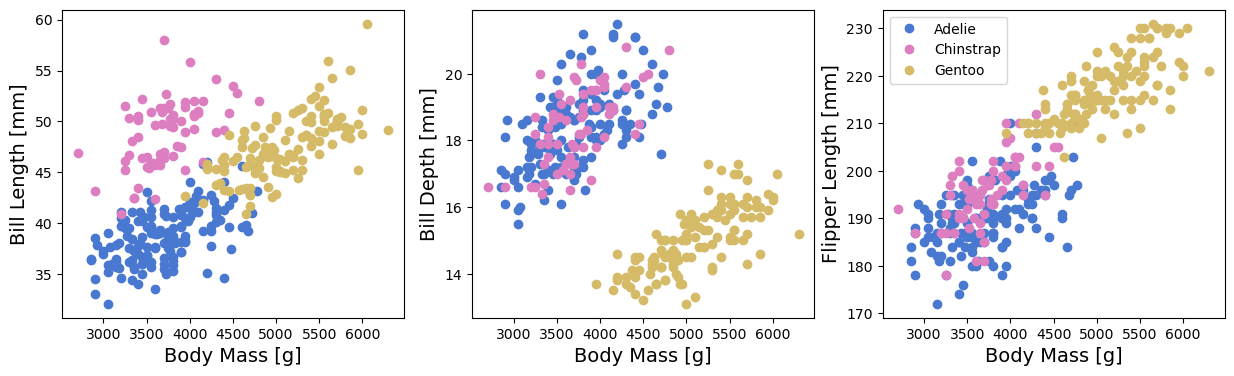

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))
    
for i, ii in enumerate(df['species'].unique()):
    ax1.plot(df[df['species']==ii]['body_mass_g'], df[df['species']==ii]['bill_length_mm'],
           marker='o', linewidth=0, color=colors[i])
    
for i, ii in enumerate(df['species'].unique()):
    ax2.plot(df[df['species']==ii]['body_mass_g'], df[df['species']==ii]['bill_depth_mm'],
           marker='o', linewidth=0, color=colors[i])    
    
for i, ii in enumerate(df['species'].unique()):
    ax3.plot(df[df['species']==ii]['body_mass_g'], df[df['species']==ii]['flipper_length_mm'],
           marker='o', linewidth=0, color=colors[i], label=ii)    
    
_ = ax1.set_ylabel('Bill Length [mm]', fontsize=14)
_ = ax2.set_ylabel('Bill Depth [mm]', fontsize=14)
_ = ax3.set_ylabel('Flipper Length [mm]', fontsize=14)

_ = ax1.set_xlabel('Body Mass [g]', fontsize=14)
_ = ax2.set_xlabel('Body Mass [g]', fontsize=14)
_ = ax3.set_xlabel('Body Mass [g]', fontsize=14)

_ = plt.legend()

From the provided figures, we can observe that the bill length of Adelie and Gentoo penguins
exhibits a strong linear relationship with their respective body masses. However, this linearity
diminishes in the case of Chinstrap penguins. Regarding bill depths, all three species demonstrate
relatively similar linear relationships with their body masses, with Gentoo penguins showing
smaller bill depths and larger body masses. As for flipper length, all three species display 
good and similar linear relationships with their body masses.

One can use `seaborn.pairplot` to visualize all possible relationships among the features.

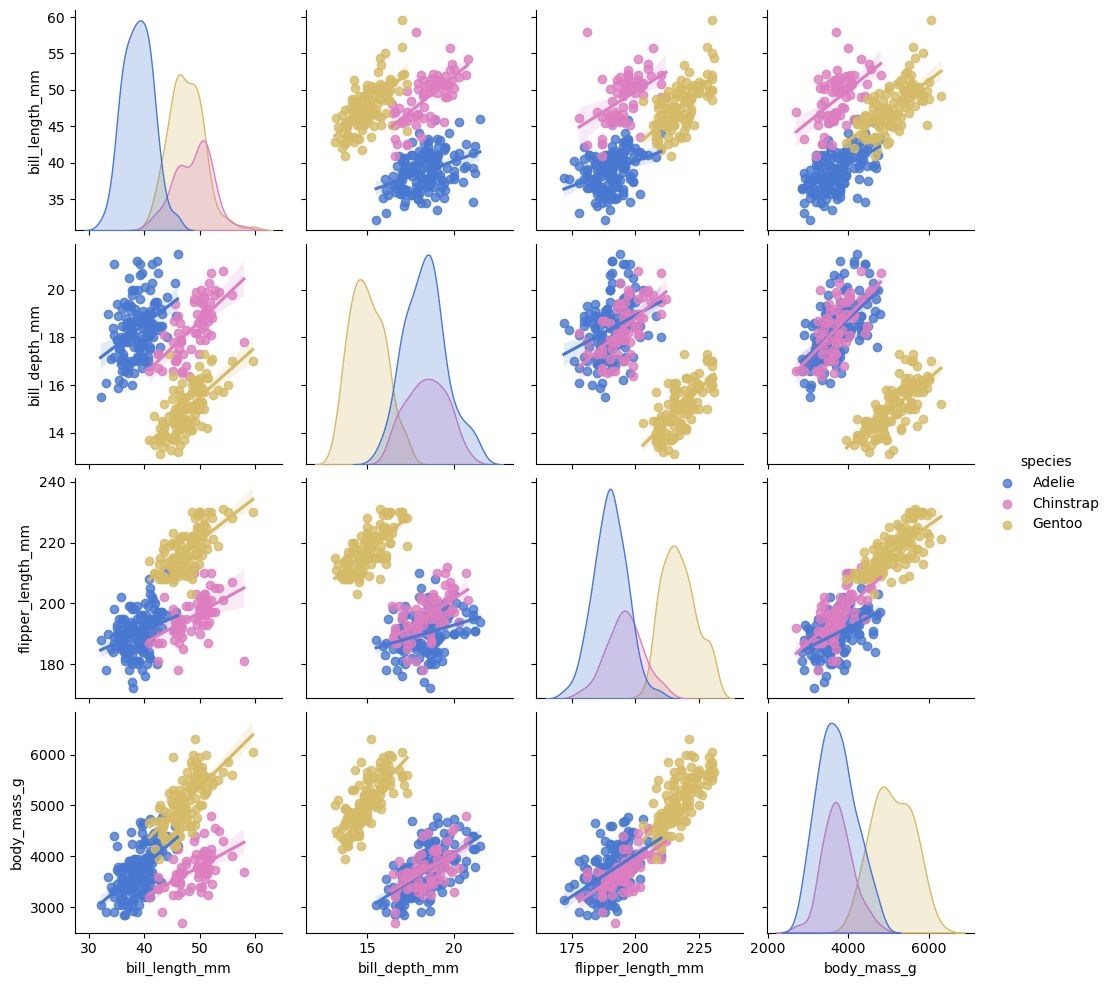

In [14]:
_ = sns.pairplot(df, hue='species', palette=colors, kind='reg')

We can also use more advanced visualization methods such as raincloud plots which
combines the elements of box plots, violin plots and scatter plots to provide
a comprehensive view of the data distrubution.It displays the data's central tendency
, spread, and individual data points simultaneously

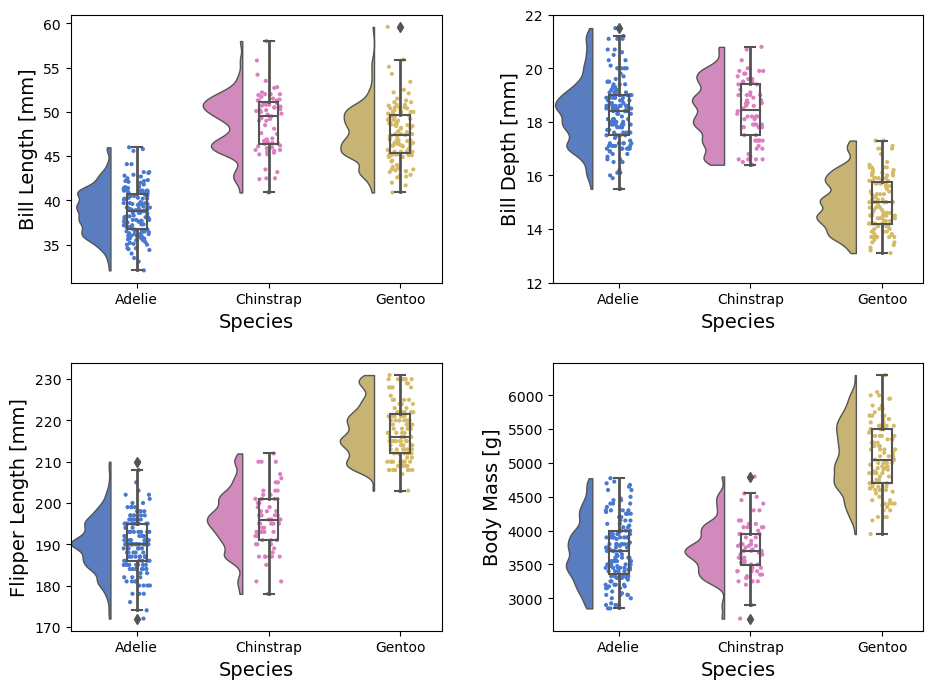

In [15]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(11, 8))

_ = pt.RainCloud(x = "species", y = "bill_length_mm", data = df, palette = colors, bw = 0.2,
                 width_viol = .6, ax = ax1, orient = 'v')

_ = pt.RainCloud(x = "species", y = "bill_depth_mm", data = df, palette = colors, bw = 0.2,
                 width_viol = .6, ax = ax2, orient = 'v')

_ = pt.RainCloud(x = "species", y = "flipper_length_mm", data = df, palette = colors, bw = 0.2,
                 width_viol = .6, ax = ax3, orient = 'v')

_ = pt.RainCloud(x = "species", y = "body_mass_g", data = df, palette = colors, bw = 0.2,
                 width_viol = .6, ax = ax4, orient = 'v')

_ = ax1.set_ylabel('Bill Length [mm]', fontsize=14)
_ = ax2.set_ylabel('Bill Depth [mm]', fontsize=14)
_ = ax3.set_ylabel('Flipper Length [mm]', fontsize=14)
_ = ax4.set_ylabel('Body Mass [g]', fontsize=14)

_ = ax1.set_xlabel('Species', fontsize=14)
_ = ax2.set_xlabel('Species', fontsize=14)
_ = ax3.set_xlabel('Species', fontsize=14)
_ = ax4.set_xlabel('Species', fontsize=14)

ax2.set_ylim(12, 22)

fig.subplots_adjust(wspace=0.3, hspace=0.3) 

The raincloud plots reveal that Chinstrap and Gentoo penguins exhibit similar bill lengths,
whereas Adelie penguins have shorter bills. Regarding bill depth, Adelie and Chinstrap penguins
demonstrate similar depths, while Gentoo penguins have smaller bill depths. In terms of flipper
lengths, Adelie and Chinstrap penguins have comparable lengths, with Gentoo penguins showing
moderately larger lengths. Additionally, the body masses follow a similar order as observed for
flipper lengths.